# PFR on Compas Dataset - Harshvardhan and Sanket

## Import Libraries and Read

In [1]:
%reset -f
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn import model_selection
import pandas as pd
import numpy as np
df = pd.read_csv('export_dataframe_compas.csv')

In [2]:
df.head()
df.columns.values

array(['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'decile_score', 'days_b_screening_arrest',
       'c_days_from_compas', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American',
       'race_Other', 'sex_Female', 'sex_Male', 'c_charge_degree_F',
       'c_charge_degree_M', 'c_charge_desc_Abuse Without Great Harm',
       'c_charge_desc_Accessory After the Fact',
       'c_charge_desc_Agg Abuse Elderlly/Disabled Adult',
       'c_charge_desc_Agg Assault Law Enforc Officer',
       'c_charge_desc_Agg Assault W/int Com Fel Dome',
       'c_charge_desc_Agg Battery Grt/Bod/Harm',
       'c_charge_desc_Agg Fleeing and Eluding',
       'c_charge_desc_Agg Fleeing/Eluding High Speed',
       'c_charge_desc_Aggr Child Abuse-Torture,Punish',
       'c_charge_desc_Aggrav Battery w/Deadly Weapon',
       'c_charge_desc_Aggrav Child Abuse-Agg Battery',
       'c_charge_desc_Aggrav Child Abuse-Causes Harm',
    

In [3]:
mat = df.to_numpy()
x=mat[:,0:-1]
print(mat.shape,x.shape)
print(x)

(6907, 456) (6907, 455)
[[69  0  0 ...  0  0  0]
 [34  0  0 ...  0  0  0]
 [24  0  0 ...  0  0  0]
 ...
 [57  0  0 ...  0  0  0]
 [33  0  0 ...  0  0  0]
 [23  0  0 ...  0  0  0]]


In [4]:
mat
df.head()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,days_b_screening_arrest,c_days_from_compas,race_African-American,race_Asian,...,c_charge_desc_Viol Injunct Domestic Violence,c_charge_desc_Viol Injunction Protect Dom Vi,c_charge_desc_Viol Pretrial Release Dom Viol,c_charge_desc_Viol Prot Injunc Repeat Viol,c_charge_desc_Violation License Restrictions,c_charge_desc_Violation Of Boater Safety Id,c_charge_desc_Violation of Injunction Order/Stalking/Cyberstalking,c_charge_desc_Voyeurism,c_charge_desc_arrest case no charge,two_year_recid
0,69,0,0,0,0,1,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,0,0,0,3,-1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,24,0,0,1,4,4,-1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,44,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,0,0,0,14,6,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
print(mat.shape)
from sklearn.neighbors import kneighbors_graph


(6907, 456)


# Wx and Wf Generation

In [6]:
p = 10               # hyper-parameter imo
xmat = np.delete(x,[8,9,10,11,12,13],1)
Wx = kneighbors_graph(xmat, p, mode='distance', include_self=True)
Wx = Wx.A
cnt=0
for i in range(Wx.shape[0]):
    for j in range(Wx.shape[0]):
        if Wx[i][j]!=0:
            cnt+=1
print(cnt)

61169


In [7]:
import math
t = 10    #hyperparameter
expf = lambda xx:  math.exp(-xx/t) if xx!=0 else 0.0
expfunc = np.vectorize(expf)
Wx = expfunc(Wx)
print(Wx)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
for i in range(x.shape[0]):
    Wx[i][i]=1.0
Wf=np.zeros((x.shape[0],x.shape[0]))


In [9]:
#8th column is race_African-American
#5th column is decile score
#Connecting individuals of the same race and having same decile score
for i in range(x.shape[0]):
    for j in range(x.shape[0]):
        if x[i][5]==x[j][5] and x[i][8]==x[j][8]:
            Wf[i][j]=1
            Wf[j][i]=1
print(Wf)       

[[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
afriscores=[]
nonafriscores=[]
#hyperparameter ---k as in kth quartile
k = 0.7
for i in range(x.shape[0]):
    if x[i][8]==1:
        afriscores.append(x[i][5])
    else:
        nonafriscores.append(x[i][5])
afriscores.sort()
nonafriscores.sort()
africutoff=afriscores[math.floor(k*(len(afriscores)-1))]
nonafricutoff=nonafriscores[math.floor(k*(len(nonafriscores)-1))]

In [11]:
print(africutoff,nonafricutoff)

7 5


In [12]:
for i in range(x.shape[0]):
    for j in range(x.shape[0]):
        cutoffi=(africutoff if x[i][8]==1 else nonafricutoff)
        cutoffj=(africutoff if x[j][8]==1 else nonafricutoff)
        if x[i][8]!=x[j][8] and ((x[i][5]<cutoffi and x[j][5]<cutoffj)or(x[i][5]>=cutoffi and x[j][5]>=cutoffj)):
            Wf[i][j]=1
            Wf[j][i]=1
print(Wf)

[[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 0. 1. 1.]]


In [13]:
orig=mat[:,-1]

orig=np.resize(orig,(orig.shape[0],1))
print(orig.shape)
print(x[:][8].shape)

(6907, 1)
(455,)


# Optimization and Z matrix generation

In [14]:
import numpy.linalg as linalg
def formlaplacian(mat):
    csum = np.sum(mat,axis=0,dtype=float)
    d = np.diag(csum)
    return d-mat


gamma = 0.5
N = Wx.shape[0]
D = 117    # Dimensions of compressed representation, probably a hyperparameter.
##


#Optimisation
def create_z(Wx,Wf,gamma,x):
    Lx=formlaplacian(Wx)
    print(Lx.shape)
    Lf=formlaplacian(Wf)
    L=gamma*Lf+(1-gamma)*Lx
    xt=np.transpose(x)
    mat=np.dot(xt,np.dot(L,x))
    eigenValues, eigenVectors = linalg.eig(mat)
    eigenValues = np.real(eigenValues)
    top_eig_ixs = np.argpartition(eigenValues, D)[:D]
    V=eigenVectors[0:,top_eig_ixs]
    z=np.dot(V.transpose(),xt)
    z = np.transpose(z)
    z = np.append(z,np.resize(x[:][8],(x.shape[0],1)),axis=1)
    z=np.real(z)
    return z

z = create_z(Wx,Wf,0.5,x)
print(z.shape)

(6907, 6907)
(6907, 118)


In [15]:
z.shape

(6907, 118)

In [16]:
z = (np.append(z, orig, axis=1))

In [17]:
z.shape

(6907, 119)

# Train Test Split and Scaling

In [35]:
#Train Test and Split for Linear Binary Classification
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
z_label = z[:,-1]
z_features = np.delete(z,118, 1)
x_features = x
mat = df.to_numpy()
x_label=mat[:,-1]

In [36]:
#Scaling and Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(z_features)
z_features = scaler.transform(z_features)

scaler.fit(x_features)
x_features = scaler.transform(x_features)



# Training the X and Z matrices

## Using XgBoost

In [37]:
from xgboost import XGBClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_features, x_label, test_size=0.33)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, predictions)
roc = roc_auc_score(y_test,predictions)
print("Accuracy(Z): %.2f%%" % (accuracy * 100.0))
print("ROC - AUC Score: %.2f%%" % (roc * 100.0))
ypredx_xgb = y_pred
ytestx_xgb = y_test
racex_xgb = np.resize(X_test[:][8],(X_test.shape[0],1))

Accuracy(Z): 69.56%
ROC - AUC Score: 69.04%


In [39]:
X_train, X_test, y_train, y_test = train_test_split(z_features, z_label, test_size=0.33)
model = XGBClassifier()
X_train = np.delete(X_train,X_train.shape[1]-1,1)
model.fit(X_train, y_train)
racez_xgb = X_test[:,-1]
for i in range(len(racez_xgb)):
    print(racez_xgb[i])
X_test = np.delete(X_test,X_test.shape[1]-1,1)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
roc = roc_auc_score(y_test,predictions)
print("Accuracy(Z) : %.2f%%" % (accuracy * 100.0))
print("ROC - AUC Score: %.2f%%" % (roc * 100.0))
ypredz_xgb=y_pred
ytestz_xgb=y_test

0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571


0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571
0.03571428571428571


## Using K-fold Cross Validation

In [23]:

import sklearn.model_selection as model_selection
kfold = model_selection.KFold(n_splits=5)
model = LogisticRegression()
results = model_selection.cross_val_score(model, x_features, x_label, cv=kfold)
print("Accuracy(X) : %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

kfold = model_selection.KFold(n_splits=5)
model = LogisticRegression()
results = model_selection.cross_val_score(model, z_features, z_label, cv=kfold)
print("Accuracy(Z) : %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Accuracy(X) : 68.293% (1.012%)


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy(Z) : 57.290% (0.623%)


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Logistic Regression with Stratified K - Folds (k = 5) & Y_preds_lr

In [24]:
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(x_features, x_label, test_size=0.33)
Cs = np.logspace(-1, 6, 8)
logistic_classifier = LogisticRegressionCV(Cs=Cs, cv=5, scoring="roc_auc",max_iter=10000, verbose=1)
logistic_classifier.fit(X_train, y_train)
print("[INFO] Best parameter: ", logistic_classifier.C_, " out of ", logistic_classifier.Cs_)
print("[INFO] Accuracy:", logistic_classifier.score(X_test,y_test))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.0s finished


[INFO] Best parameter:  [1.]  out of  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
[INFO] Accuracy: 0.7292894544875073


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [25]:
y_predx_lr = logistic_classifier.predict(x_features)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(z_features, z_label, test_size=0.33)
Cs = np.logspace(-1, 6, 8)
logistic_classifier = LogisticRegressionCV(Cs=Cs, cv=5, scoring="roc_auc",max_iter=10000, verbose=1)
logistic_classifier.fit(X_train, y_train)
print("[INFO] Best parameter: ", logistic_classifier.C_, " out of ", logistic_classifier.Cs_)
print("[INFO] Accuracy:", logistic_classifier.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.0s finished


[INFO] Best parameter:  [100000.]  out of  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
[INFO] Accuracy: 0.7138648174872632


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [27]:
y_predz_lr = logistic_classifier.predict(z_features)

# Grid Search Block

In [38]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))



/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWa

/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sanket/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Accuracy Score : 0.6807017543859649
Precision Score : 0.6823027718550106
Recall Score : 0.5981308411214953
F1 Score : 0.6374501992031872


In [41]:
print(ypredx_xgb)

[1 0 1 ... 0 0 0]


In [42]:
print(ypredz_xgb)

[1. 1. 0. ... 0. 1. 0.]


# Fairness Measures 

In [40]:
def consistency(W,Y):
    n = W.shape[0]
    m = W.shape[1]
    denom = np.sum(W)
    outer_sum = 0
    inner_sum = 0
    for i in range(n):
        for j in range(m):
            if i != j:
                inner_sum+=np.abs(Y[i]-Y[j])*W[i][j]
    outer_sum = 1-inner_sum*1.0/denom
    return outer_sum

In [41]:
print("Consistency (Wf,Z): ",consistency(Wf,z_label))
print("Consistency (Wx,Z): ",consistency(Wx,z_label))

Consistency (Wf,Z):  0.5466826224446439
Consistency (Wx,Z):  0.6483295048383104


In [42]:
# disparate impact
def positive_prediction_rate(ypred,race,ytest,racearr): # race is 1 for African-American, 0 otherwise
    cnt = 0
    pos = 0
    for i in range(len(ypred)):
        rr = racearr[i]
        if rr!=0.0:
            rr=1.0
        if rr==race:
            cnt+=1
            pos+=ypred[i]
    return pos*1.0/cnt
print("Positive Prediction Rate for African-Americans PFR:(XgBoost) ",positive_prediction_rate(ypredz_xgb,1,ytestz_xgb,racez_xgb))
print("Positive Prediction Rate for Non-African-Americans PFR: (XgBoost)",positive_prediction_rate(ypredz_xgb,0,ytestz_xgb,racez_xgb))
print("Positive Prediction Rate for African-Americans Original Representation: (XgBoost)",positive_prediction_rate(ypredx_xgb,1,ytestx_xgb,racex_xgb))
print("Positive Prediction Rate for Non-African-Americans Original Representation: (XgBoost)",positive_prediction_rate(ypredx_xgb,0,ytestx_xgb,racex_xgb))
print("\n")

#print("Positive Prediction Rate for African-Americans PFR:(Logistic Regression) ",positive_prediction_rate(y_predz_lr,1))
#print("Positive Prediction Rate for Non-African-Americans PFR: (Logistic Regression)",positive_prediction_rate(y_predz_lr,0))
#print("Positive Prediction Rate for African-Americans Original Representation: (Logistic Regression)",positive_prediction_rate(y_predx_lr,1))
#print("Positive Prediction Rate for Non-African-Americans Original Representation: (Logistic Regression)",positive_prediction_rate(y_predx_lr,0))



Positive Prediction Rate for African-Americans PFR:(XgBoost)  0.43409490333919154
Positive Prediction Rate for Non-African-Americans PFR: (XgBoost) 0.5
Positive Prediction Rate for African-Americans Original Representation: (XgBoost) 0.41935483870967744
Positive Prediction Rate for Non-African-Americans Original Representation: (XgBoost) 0.40551356158292573




In [43]:
# disparate mistreatment
def error_rates(ypred,race,ytest,racearr):
    cnt=0
    errors=0
    for i in range(len(ypred)):
        rr = racearr[i]
        if rr!=0.0:
            rr=1.0
        if rr==race:
            cnt+=1
            errors+= int(ypred[i]!=ytest[i])
    return errors*1.0/cnt
print("Prediction Error Rate for African-Americans PFR:(XgBoost) ",error_rates(ypredz_xgb,1,ytestz_xgb,racez_xgb))
print("Prediction Error Rate for Non-African-Americans PFR: (XgBoost)",error_rates(ypredz_xgb,0,ytestz_xgb,racez_xgb))
print("Prediction Error Rate for African-Americans Original Representation: (XgBoost)",error_rates(ypredx_xgb,1,ytestx_xgb,racex_xgb))
print("Prediction Error Rate for Non-African-Americans Original Representation: (XgBoost)",error_rates(ypredx_xgb,0,ytestx_xgb,racex_xgb))
print("\n")

#print("Prediction Error Rate for African-Americans PFR:(Logistic Regression) ",error_rates(y_predz_lr,1))
#print("Prediction Error Rate for Non-African-Americans PFR:(Logistic Regression) ",error_rates(y_predz_lr,0))
#print("Prediction Error Rate for African-Americans Original Representation:(Logistic Regression) ",error_rates(y_predx_lr,1))
#print("Prediction Error Rate for Non-African-Americans Original Representation:(Logistic Regression) ",error_rates(y_predx_lr,0))

Prediction Error Rate for African-Americans PFR:(XgBoost)  0.3391915641476274
Prediction Error Rate for Non-African-Americans PFR: (XgBoost) 0.75
Prediction Error Rate for African-Americans Original Representation: (XgBoost) 0.3225806451612903
Prediction Error Rate for Non-African-Americans Original Representation: (XgBoost) 0.3041351711871943




In [44]:
def fpr(ypred,race,ytest,racearr):
    fp = 0
    tn = 0
    for i in range(len(ypred)):
        rr = racearr[i]
        if rr!=0.0:
            rr=1.0
        if rr==race:
            if(ypred[i]==ytest[i] and ypred[i]==0):
                tn+=1
            elif ypred[i]!=ytest[i] and ypred[i]==1:
                fp+=1
    return fp*1.0/(fp+tn)
print("False Positive Rate for African-Americans PFR:(XGBoost) ",fpr(ypredz_xgb,1,ytestz_xgb,racez_xgb))
print("False Positive Rate for Non-African-Americans PFR:(XGBoost) ",fpr(ypredz_xgb,0,ytestz_xgb,racez_xgb))
print("False Positive Rate for African-Americans Original Representation:(XGBoost) ",fpr(ypredx_xgb,1,ytestx_xgb,racex_xgb))
print("False Positive Rate for Non-African-Americans Original Representation:(XGBoost) ",fpr(ypredx_xgb,0,ytestx_xgb,racex_xgb))

#print("False Positive Rate for African-Americans PFR:(Logistic Regression) ",fpr(y_predz_lr,1))
#print("False Positive Rate for Non-African-Americans PFR:(Logistic Regression) ",fpr(y_predz_lr,0))
#print("False Positive Rate for African-Americans Original Representation:(Logistic Regression) ",fpr(y_predx_lr,1))
#print("False Positive Rate for Non-African-Americans Original Representation:(Logistic Regression) ",fpr(y_predx_lr,0))

False Positive Rate for African-Americans PFR:(XGBoost)  0.2853577371048253
False Positive Rate for Non-African-Americans PFR:(XGBoost)  0.6666666666666666
False Positive Rate for African-Americans Original Representation:(XGBoost)  0.3
False Positive Rate for Non-African-Americans Original Representation:(XGBoost)  0.22632020117351215


In [45]:
z_arr = []
gamma_arr = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for gg in gamma_arr:
    mtrx = create_z(Wx,Wf,gg,x)
    mtrx = np.append(mtrx,orig,axis = 1)
    print(mtrx)
    z_arr.append(mtrx)
print(len(z_arr))
np.save('z_arr',z_arr)

(6907, 6907)
[[-2.00079467e+01  0.00000000e+00  0.00000000e+00 ... -2.08130227e-03
   2.70000000e+01  0.00000000e+00]
 [-1.05870150e+01  0.00000000e+00  0.00000000e+00 ... -2.11329848e-03
   0.00000000e+00  1.00000000e+00]
 [-1.11880761e+01  0.00000000e+00  0.00000000e+00 ... -3.05744875e-03
   0.00000000e+00  1.00000000e+00]
 ...
 [-1.65646782e+01  0.00000000e+00  0.00000000e+00 ... -1.92289666e-03
   0.00000000e+00  0.00000000e+00]
 [-1.28209161e+01  0.00000000e+00  0.00000000e+00 ... -3.07476964e-04
   0.00000000e+00  0.00000000e+00]
 [-9.90796573e+00  0.00000000e+00  0.00000000e+00 ... -8.25194152e-04
   0.00000000e+00  1.00000000e+00]]
(6907, 6907)
[[-4.83100164e-03 -1.62666805e-03  0.00000000e+00 ... -1.34415857e-03
   2.70000000e+01  0.00000000e+00]
 [-4.20585432e-03 -1.18730675e-03  0.00000000e+00 ...  7.83571913e-05
   0.00000000e+00  1.00000000e+00]
 [-3.93217261e-03 -8.69482487e-04  0.00000000e+00 ...  6.56507727e-04
   0.00000000e+00  1.00000000e+00]
 ...
 [-5.10321074e-03 

In [46]:
z_arr[0].shape

(6907, 119)

In [47]:
z.shape

(6907, 119)

# Influence of Gamma : (Influence of Wf)

In [256]:
model = XGBClassifier()
scores_util = []
scores_acc=[]
for z in z_arr:
    z = np.real(z)
    z_label = z[:,-1]
    z_features = np.delete(z,118, 1)
    scaler.fit(z_features)
    z_features = scaler.transform(z_features)
    X_train, X_test, y_train, y_test = train_test_split(z_features, z_label, test_size=0.33)
    X_train = np.delete(X_train,X_train.shape[1]-1,1)
    model.fit(X_train, y_train)
    #racez_xgb = X_test[:,-1]
    X_test = np.delete(X_test,X_test.shape[1]-1,1)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    accuracy = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test,predictions)
    scores_acc.append(accuracy)
    scores_util.append(roc)
    print("Accuracy Scores(Z): %.2f%%" % (accuracy * 100.0))
    print("ROC_AUC Scores(Z): %.2f%%" % (roc * 100.0))

print(len(scores_util))

Accuracy Scores(Z): 63.16%
ROC_AUC Scores(Z): 62.62%
Accuracy Scores(Z): 64.21%
ROC_AUC Scores(Z): 63.81%
Accuracy Scores(Z): 65.00%
ROC_AUC Scores(Z): 64.70%
Accuracy Scores(Z): 65.04%
ROC_AUC Scores(Z): 64.54%
Accuracy Scores(Z): 64.96%
ROC_AUC Scores(Z): 64.53%
Accuracy Scores(Z): 65.48%
ROC_AUC Scores(Z): 65.35%
Accuracy Scores(Z): 65.48%
ROC_AUC Scores(Z): 65.09%
Accuracy Scores(Z): 64.30%
ROC_AUC Scores(Z): 63.92%
Accuracy Scores(Z): 65.18%
ROC_AUC Scores(Z): 64.82%
Accuracy Scores(Z): 65.88%
ROC_AUC Scores(Z): 65.56%
Accuracy Scores(Z): 65.48%
ROC_AUC Scores(Z): 65.15%
11


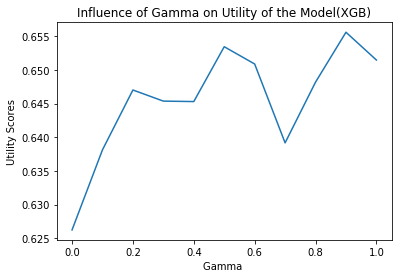

In [257]:
plt.plot(gamma_arr, scores_util) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Utility Scores') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on Utility of the Model(XGB)') 
  
# function to show the plot 
plt.show() 

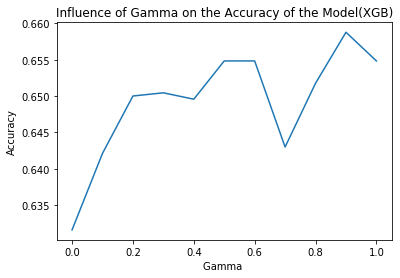

In [258]:
plt.plot(gamma_arr, scores_acc) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on the Accuracy of the Model(XGB)') 
  
# function to show the plot 
plt.show() 

In [128]:
scores_lr = []
for z in z_arr:
    z = np.real(z)
    z_label = z[:,-1]
    z_features = np.delete(z,117, 1)
    X_train, X_test, y_train, y_test = train_test_split(z_features, z_label, test_size=0.33)
    Cs = np.logspace(-2, 6, 8)
    logistic_classifier = LogisticRegressionCV(Cs=Cs, cv=5, scoring="roc_auc",max_iter=10000, verbose=1)
    logistic_classifier.fit(X_train, y_train)
    print("[INFO] Best parameter: ", logistic_classifier.C_, " out of ", logistic_classifier.Cs_)
    score = logistic_classifier.score(X_test, y_test)
    scores_lr.append(score)
    print("[INFO] Accuracy:", score )

print(len(scores_lr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s finished


[INFO] Best parameter:  [71968.56730012]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6635671570280197


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.9s finished


[INFO] Best parameter:  [1000000.]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6712015931770461


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s finished


[INFO] Best parameter:  [1000000.]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6882347602691911


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.7s finished


[INFO] Best parameter:  [1000000.]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6771328155339806


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s finished


[INFO] Best parameter:  [71968.56730012]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6881132075471699


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished


[INFO] Best parameter:  [1000000.]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6816659722603352


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.1s finished


[INFO] Best parameter:  [71968.56730012]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.677074808739104


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.7s finished


[INFO] Best parameter:  [71968.56730012]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6678709478709478


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s finished


[INFO] Best parameter:  [1000000.]  out of  [1.00000000e-02 1.38949549e-01 1.93069773e+00 2.68269580e+01
 3.72759372e+02 5.17947468e+03 7.19685673e+04 1.00000000e+06]
[INFO] Accuracy: 0.6878094018586423
9


C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


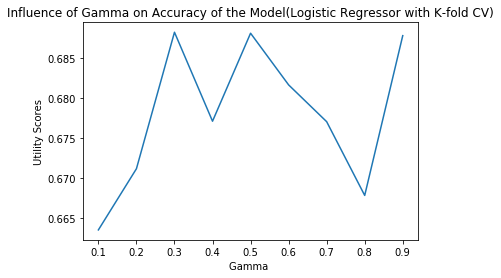

In [129]:
plt.plot(gamma_arr, scores_lr) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Utility Scores') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on Accuracy of the Model(Logistic Regressor with K-fold CV)') 
  
# function to show the plot 
plt.show() 

In [175]:
print(Wx)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [178]:
racez_xgb

array([0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
       0.03571429])

In [197]:
racex_xgb

array([[0.06410256],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.33333333],
       [0.05263158]])

In [199]:
ytestz_xgb

array([0., 1., 0., ..., 0., 0., 1.])

Consistency (Wf):  0.5572134610474291
Consistency (Wx):  0.6805455947787987
Consistency (Wf):  0.5665862027726578
Consistency (Wx):  0.6787131587965259
Consistency (Wf):  0.5682206603150655
Consistency (Wx):  0.6840525588702371
Consistency (Wf):  0.5622914154592107
Consistency (Wx):  0.6761927573537077
4


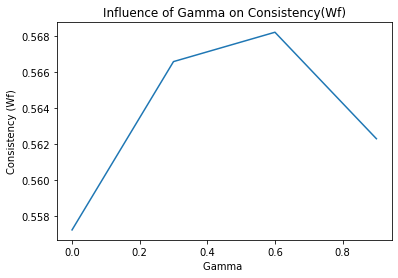

In [48]:
scores_cons_wf=[]
scores_cons_wx=[]
gamma_few=[]
for i in range(0,len(gamma_arr),3):
    z=z_arr[i]
    gamma_few.append(gamma_arr[i])
    z = np.real(z)
    z_label = z[:,-1]
    z_features = np.delete(z,118, 1)
    scaler.fit(z_features)
    z_features = scaler.transform(z_features)
    X_train, X_test, y_train, y_test = train_test_split(z_features, z_label, test_size=0.33)
    X_train = np.delete(X_train,X_train.shape[1]-1,1)
    model.fit(X_train, y_train)
    X_test = np.delete(z_features,z_features.shape[1]-1,1)
    y_pred = model.predict(X_test)
    
    var1=consistency(Wf,y_pred)
    var2=consistency(Wx,y_pred)
    print("Consistency (Wf): ",var1)
    print("Consistency (Wx): ",var2)
    scores_cons_wf.append(var1)
    scores_cons_wx.append(var2)    
print(len(scores_cons_wf))
plt.plot(gamma_few, scores_cons_wf) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Consistency (Wf)') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on Consistency(Wf)') 
  
# function to show the plot 
plt.show()

4


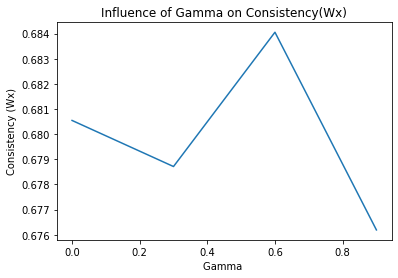

In [49]:
print(len(scores_cons_wx))
plt.plot(gamma_few, scores_cons_wx) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Consistency (Wx)') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on Consistency(Wx)') 
  
# function to show the plot 
plt.show()

In [51]:
scores_fpr_black=[]
scores_fpr_non_black=[]
model = XGBClassifier()
cnt=0
for z in z_arr:
    z = np.real(z)
    z_label = z[:,-1]
    z_features = np.delete(z,118, 1)
    scaler.fit(z_features)
    z_features = scaler.transform(z_features)
    X_train, X_test, y_train, y_test = train_test_split(z_features, z_label, test_size=0.33)
    X_train = np.delete(X_train,X_train.shape[1]-1,1)
    model.fit(X_train, y_train)
    racez_xgb = X_test[:,-1]
    X_test = np.delete(X_test,X_test.shape[1]-1,1)
    y_pred = model.predict(X_test)
    print(gamma_arr[cnt])
    cnt+=1
    scores_fpr_black.append(fpr(y_pred,1,y_test,racez_xgb))
    scores_fpr_non_black.append(fpr(y_pred,0,y_test,racez_xgb))
    

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


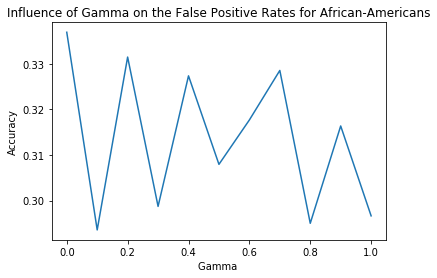

In [52]:
plt.plot(gamma_arr, scores_fpr_black) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on the False Positive Rates for African-Americans') 
  
# function to show the plot 
plt.show() 

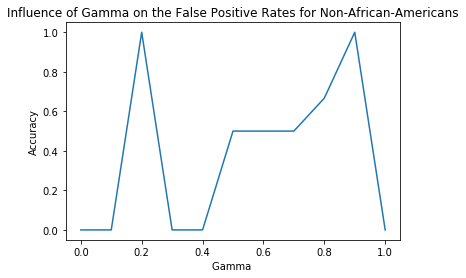

In [53]:
plt.plot(gamma_arr, scores_fpr_non_black) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on the False Positive Rates for Non-African-Americans') 
  
# function to show the plot 
plt.show() 

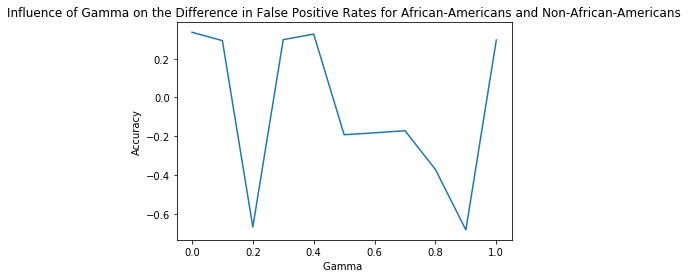

In [54]:
scores_fpr_difference=[]
for i in range(len(gamma_arr)):
    scores_fpr_difference.append(scores_fpr_black[i]-scores_fpr_non_black[i])
plt.plot(gamma_arr, scores_fpr_difference) 
  
# naming the x axis 
plt.xlabel('Gamma ') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Influence of Gamma on the Difference in False Positive Rates for African-Americans and Non-African-Americans') 
  
# function to show the plot 
plt.show()